<h2 align="center">Multiple Linear Regression</h2>

1. Supervised Learning Algorithm
2. The response/the value to be precited is continuous (quantitaive) in nature

The dataset being used is an advertisement dataset, in which the dependent variable is sales (the amount of sales generated, by using the three advertisement channels - TV, Radio, Newspaper

### Task 1: Importing the libraries
---

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing basic libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
#from scipy.stats import norm, uniform
from scipy.stats import shapiro
#from numpy.random import randn

### Task 2: Loading the dataset and performing basic explorations to get an idea about the dataset

In [4]:
path = 'C:/Users/AZIMUT Info/OneDrive/Desktop/repos/data.csv'

In [5]:
df = pd.read_csv(path)

In [6]:
df.head()

,sexe,age,imc,vems,dep,cvf,dem25,dem50,dem75,aex
0,homme,80.0,27.25,2.19,6.66,2.57,1.30,4.36,6.61,7.39
1,femme,88.0,35.60,1.01,2.09,1.28,0.52,1.58,2.08,1.49
2,femme,66.0,27.25,2.31,6.22,2.61,1.52,4.30,6.15,8.35
3,homme,35.0,35.17,3.00,11.38,3.37,2.20,8.84,11.12,21.19
4,homme,50.0,40.39,3.08,7.41,3.86,1.43,3.14,4.75,12.16


The values of all the features are numeric

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sexe    220 non-null    object 
 1   age     220 non-null    float64
 2   imc     220 non-null    float64
 3   vems    220 non-null    float64
 4   dep     220 non-null    float64
 5   cvf     220 non-null    float64
 6   dem25   220 non-null    float64
 7   dem50   220 non-null    float64
 8   dem75   220 non-null    float64
 9   aex     220 non-null    float64
dtypes: float64(9), object(1)
memory usage: 17.3+ KB


In [8]:
df.shape

(220, 10)

In [9]:
df.isnull().sum()

sexe     0
age      0
imc      0
vems     0
dep      0
cvf      0
dem25    0
dem50    0
dem75    0
aex      0
dtype: int64

In [10]:
df.isna().sum()

sexe     0
age      0
imc      0
vems     0
dep      0
cvf      0
dem25    0
dem50    0
dem75    0
aex      0
dtype: int64

The dataset consists of 11 columns and 220 records and there are no null values in the dataset

In [11]:
df.columns

Index(['sexe', 'age', 'imc', 'vems', 'dep', 'cvf', 'dem25', 'dem50', 'dem75',
       'aex'],
      dtype='object')

In [12]:
print(df['sexe'].value_counts())
print((df['sexe'].value_counts(normalize=True)*100).round(2))

sexe
femme    127
homme     93
Name: count, dtype: int64
sexe
femme    57.73
homme    42.27
Name: proportion, dtype: float64


In [13]:
# Creating Data audit Report
# Use a general function that returns multiple values

def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25/Q1' ,'P50/Q2' ,'P75/Q3' ,'P90' ,'P95' ,'P99' ,'MAX'])
def var_summary(x):
    uc = x.mean()+(2*x.std())
    lc = x.mean()-(2*x.std())
    
    for i in x:
        if i<lc or i>uc:
            count = 1
        else:
            count = 0
    outlier_flag = count
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(),x.quantile(0.25),x.quantile(0.75),x.max() , lc , uc,outlier_flag],
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN','P25' ,'P75','MAX','LC','UC','outlier_flag'])



# UC = MEAN + 2 STD

In [14]:
df.drop(columns = ['sexe']).apply(lambda x: var_summary(x)).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P25,P75,MAX,LC,UC,outlier_flag
age,220.0,0.0,10193.00,46.331818,48.000,22.100722,488.441905,7.00,29.7500,65.0000,88.00,2.130375,90.533262,0.0
imc,220.0,0.0,6085.84,27.662909,27.140,7.129632,50.831646,13.02,22.7700,31.9950,57.81,13.403646,41.922172,0.0
vems,220.0,0.0,450.83,2.049227,2.035,0.799872,0.639795,0.54,1.4075,2.6450,4.36,0.449483,3.648971,0.0
dep,220.0,0.0,1228.91,5.585955,5.365,2.286645,5.228747,1.33,3.7900,7.1600,12.42,1.012664,10.159245,0.0
cvf,220.0,0.0,552.02,2.509182,2.495,0.927272,0.859834,0.67,1.7200,3.1750,5.15,0.654637,4.363727,0.0
dem25,220.0,0.0,258.07,1.173045,1.080,0.693689,0.481205,0.09,0.6550,1.5550,4.62,-0.214333,2.560424,0.0
dem50,220.0,0.0,712.20,3.237273,3.125,1.631820,2.662837,0.26,2.0300,4.3075,9.27,-0.026368,6.500913,0.0
dem75,220.0,0.0,1145.59,5.207227,5.230,2.255535,5.087438,0.51,3.5800,6.7150,12.42,0.696157,9.718297,0.0
aex,220.0,0.0,1589.25,7.223864,6.190,5.295458,28.041875,0.39,2.7425,10.2500,29.42,-3.367052,17.814780,0.0


In [15]:
df.drop(columns = ['sexe']).apply(lambda x: var_summary(x)).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P25,P75,MAX,LC,UC,outlier_flag
age,220.0,0.0,10193.00,46.331818,48.000,22.100722,488.441905,7.00,29.7500,65.0000,88.00,2.130375,90.533262,0.0
imc,220.0,0.0,6085.84,27.662909,27.140,7.129632,50.831646,13.02,22.7700,31.9950,57.81,13.403646,41.922172,0.0
vems,220.0,0.0,450.83,2.049227,2.035,0.799872,0.639795,0.54,1.4075,2.6450,4.36,0.449483,3.648971,0.0
dep,220.0,0.0,1228.91,5.585955,5.365,2.286645,5.228747,1.33,3.7900,7.1600,12.42,1.012664,10.159245,0.0
cvf,220.0,0.0,552.02,2.509182,2.495,0.927272,0.859834,0.67,1.7200,3.1750,5.15,0.654637,4.363727,0.0
dem25,220.0,0.0,258.07,1.173045,1.080,0.693689,0.481205,0.09,0.6550,1.5550,4.62,-0.214333,2.560424,0.0
dem50,220.0,0.0,712.20,3.237273,3.125,1.631820,2.662837,0.26,2.0300,4.3075,9.27,-0.026368,6.500913,0.0
dem75,220.0,0.0,1145.59,5.207227,5.230,2.255535,5.087438,0.51,3.5800,6.7150,12.42,0.696157,9.718297,0.0
aex,220.0,0.0,1589.25,7.223864,6.190,5.295458,28.041875,0.39,2.7425,10.2500,29.42,-3.367052,17.814780,0.0


In [16]:
#var_summary(advt.TV)
#var_summary(df.aex)

In [17]:
#df["aex"] = df.aex.clip(lower = 10  , upper = 100)

In [18]:
#var_summary(df.aex)

In [19]:
df.describe()

,age,imc,vems,dep,cvf,dem25,dem50,dem75,aex
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,46.331818,27.662909,2.049227,5.585955,2.509182,1.173045,3.237273,5.207227,7.223864
std,22.100722,7.129632,0.799872,2.286645,0.927272,0.693689,1.631820,2.255535,5.295458
min,7.000000,13.020000,0.540000,1.330000,0.670000,0.090000,0.260000,0.510000,0.390000
25%,29.750000,22.770000,1.407500,3.790000,1.720000,0.655000,2.030000,3.580000,2.742500
50%,48.000000,27.140000,2.035000,5.365000,2.495000,1.080000,3.125000,5.230000,6.190000
75%,65.000000,31.995000,2.645000,7.160000,3.175000,1.555000,4.307500,6.715000,10.250000
max,88.000000,57.810000,4.360000,12.420000,5.150000,4.620000,9.270000,12.420000,29.420000


In [20]:
df["age_disc"]=pd.cut(
    df["age"], 
    bins=[df["age"].min(), 
          12,
          18,
          35,
          65,
          df["age"].max()
         ],
    include_lowest = True)
print(df["age_disc"].value_counts())
print((df["age_disc"].value_counts(normalize = True)*100).round(2))

age_disc
(35.0, 65.0]     89
(65.0, 88.0]     53
(18.0, 35.0]     45
(6.999, 12.0]    19
(12.0, 18.0]     14
Name: count, dtype: int64
age_disc
(35.0, 65.0]     40.45
(65.0, 88.0]     24.09
(18.0, 35.0]     20.45
(6.999, 12.0]     8.64
(12.0, 18.0]      6.36
Name: proportion, dtype: float64


### Task 3: Exploratory Data Analysis

# An EDA checklist
1. What question(s) are you trying to solve (or prove wrong)?
2. What kind of data do you have and how do you treat different types?
3. What’s missing from the data and how do you deal with it?

The first three questions of the EDA checklist could be answered as a result of our initial analysis.

1. We are trying to build a linear regression model to predict the value of sales generated by using TV, Radio 
and Newspaper advertisement channels
2. We have the advertisement dataset consisting of 200 observations and all the features are numeric
3. There are no missing values in the dataset



In [21]:
import seaborn as sns

<Axes: >

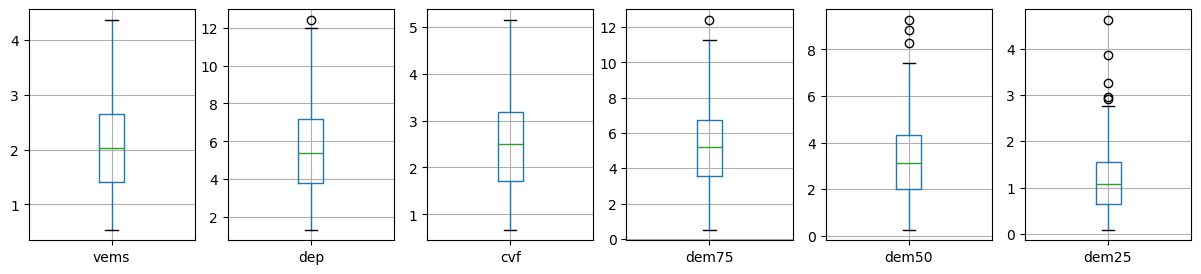

In [22]:
fig, axes = plt.subplots(1,6,figsize = (15,3))
df.boxplot("vems", ax = axes[0])
df.boxplot("dep", ax = axes[1])
df.boxplot("cvf", ax = axes[2])
df.boxplot("dem75", ax = axes[3])
df.boxplot("dem50", ax = axes[4])
df.boxplot("dem25", ax = axes[5])


In [23]:
# x="flipper_length_mm",

### Corrélation

<Axes: xlabel='dem25', ylabel='Density'>

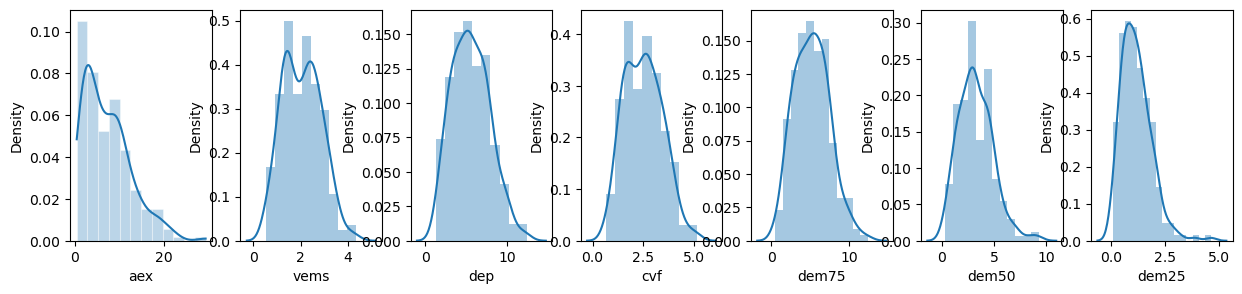

In [25]:
fig, axes = plt.subplots(1,7,figsize = (15,3))
#sns.distplot(df['aex'], ax = axes[0])
#sns.histplot(df["aex"], kde=True,  alpha=.4, edgecolor=(1, 1, 1, .4), ax = axes[0])
#sns.histplot(df["aex"], stat="density", kde=True, alpha=.3, edgecolor=(1, 1, 1, .4), ax = axes[0])
sns.histplot(df['aex'], stat="density", kde=True, alpha=.3, edgecolor=(1, 1, 1, .4), ax = axes[0])
sns.distplot(df['vems'], ax = axes[1])
sns.distplot(df['dep'], ax = axes[2])
sns.distplot(df["cvf"], ax = axes[3])
sns.distplot(df['dem75'], ax = axes[4])
sns.distplot(df['dem50'], ax = axes[5])
sns.distplot(df['dem25'], ax = axes[6])

Exploring Relationships between aex and the other input variables

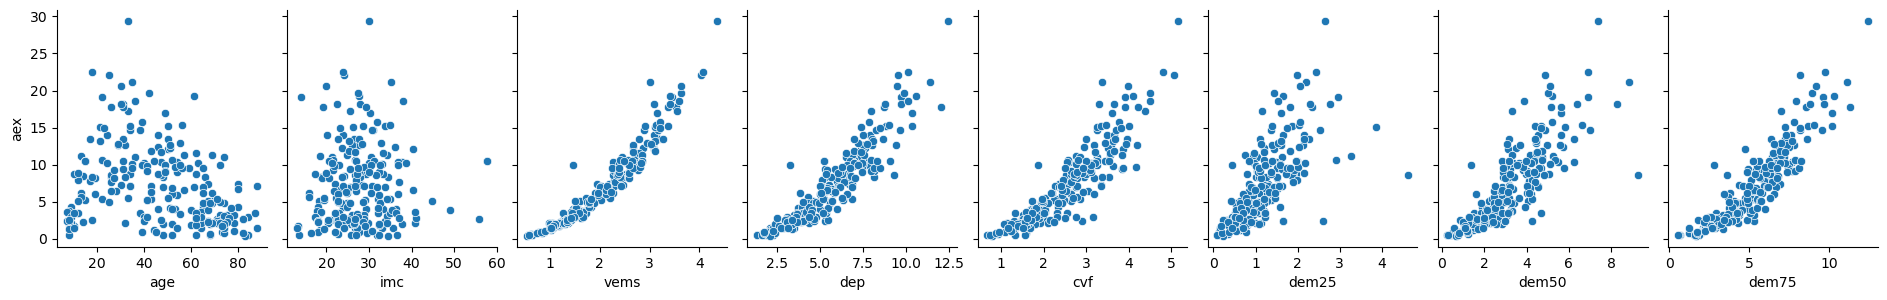

In [39]:
sns.pairplot(df, x_vars=['age', 'imc', 'vems', 'dep', 'cvf', 'dem25', 'dem50', 'dem75'], y_vars='aex', height=3, aspect=0.8);

In [40]:
#sns.pairplot(df.drop(columns = ['sexe', 'imc', 'age', 'aex']))

The relationship between vems/cvf and aex is fairly linear

The correlations here suggest associations/relations and does not imply direct causation

Since it is a simple linear regression problem, the model will contain only one independent variable.
To find that one variable among the three available input variables, we check the strength of 
linear relationship/correlation between the three predictor variables and sales

From the above table, we see that the variable that is strongly correlated with sales is vems. So we will be using 
the TV variable to be our input variable.

In [27]:
df = pd.read_csv(path)

In [28]:
corr_df1 = (df.drop(columns = ['sexe', 'age', 'imc']).corr(method="pearson")).round(2)

corr_df1.style.background_gradient(cmap="coolwarm")

,vems,dep,cvf,dem25,dem50,dem75,aex
vems,1.000000,0.900000,0.960000,0.720000,0.780000,0.880000,0.950000
dep,0.900000,1.000000,0.860000,0.690000,0.840000,0.960000,0.920000
cvf,0.960000,0.860000,1.000000,0.590000,0.650000,0.790000,0.900000
dem25,0.720000,0.690000,0.590000,1.000000,0.870000,0.680000,0.700000
dem50,0.780000,0.840000,0.650000,0.870000,1.000000,0.850000,0.810000
dem75,0.880000,0.960000,0.790000,0.680000,0.850000,1.000000,0.900000
aex,0.950000,0.920000,0.900000,0.700000,0.810000,0.900000,1.000000


In [29]:
corr_df = (df.drop(columns = ['sexe']).corr(method="pearson")).round(2)

corr_df.style.background_gradient(cmap="coolwarm")

,age,imc,vems,dep,cvf,dem25,dem50,dem75,aex
age,1.000000,0.370000,-0.370000,-0.280000,-0.350000,-0.420000,-0.250000,-0.270000,-0.310000
imc,0.370000,1.000000,0.030000,0.090000,-0.000000,-0.030000,0.080000,0.090000,0.060000
vems,-0.370000,0.030000,1.000000,0.900000,0.960000,0.720000,0.780000,0.880000,0.950000
dep,-0.280000,0.090000,0.900000,1.000000,0.860000,0.690000,0.840000,0.960000,0.920000
cvf,-0.350000,-0.000000,0.960000,0.860000,1.000000,0.590000,0.650000,0.790000,0.900000
dem25,-0.420000,-0.030000,0.720000,0.690000,0.590000,1.000000,0.870000,0.680000,0.700000
dem50,-0.250000,0.080000,0.780000,0.840000,0.650000,0.870000,1.000000,0.850000,0.810000
dem75,-0.270000,0.090000,0.880000,0.960000,0.790000,0.680000,0.850000,1.000000,0.900000
aex,-0.310000,0.060000,0.950000,0.920000,0.900000,0.700000,0.810000,0.900000,1.000000


In [30]:
df.drop(columns = ['sexe']).corr()

,age,imc,vems,dep,cvf,dem25,dem50,dem75,aex
age,1.000000,0.369441,-0.368844,-0.277273,-0.349294,-0.420174,-0.254626,-0.266736,-0.309734
imc,0.369441,1.000000,0.031159,0.089386,-0.004019,-0.027907,0.075265,0.088650,0.055723
vems,-0.368844,0.031159,1.000000,0.900654,0.956094,0.724886,0.782955,0.881075,0.954411
dep,-0.277273,0.089386,0.900654,1.000000,0.855301,0.686166,0.836923,0.958301,0.915715
cvf,-0.349294,-0.004019,0.956094,0.855301,1.000000,0.587731,0.645117,0.788908,0.897242
dem25,-0.420174,-0.027907,0.724886,0.686166,0.587731,1.000000,0.867731,0.679413,0.704621
dem50,-0.254626,0.075265,0.782955,0.836923,0.645117,0.867731,1.000000,0.853740,0.813329
dem75,-0.266736,0.088650,0.881075,0.958301,0.788908,0.679413,0.853740,1.000000,0.904563
aex,-0.309734,0.055723,0.954411,0.915715,0.897242,0.704621,0.813329,0.904563,1.000000


<Axes: >

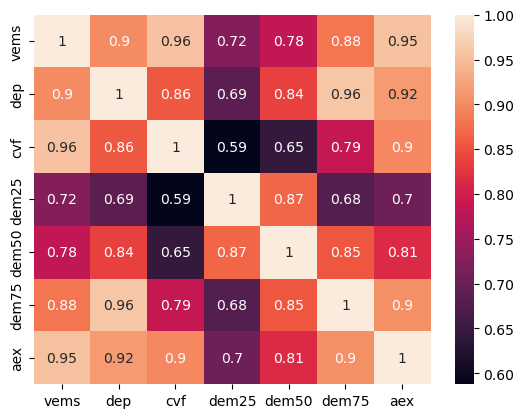

In [31]:
sns.heatmap(df.drop(columns = ['sexe', 'age', 'imc']).corr(), annot=True )

In [32]:
print("La matrice de corrélation avec tous les paramètres est:")
print(corr_df, "\n")

print("La matrice de correlation avec les paramètres spirométriques est:")
print(corr_df1, "\n")

La matrice de corrélation avec tous les paramètres est:
        age   imc  vems   dep   cvf  dem25  dem50  dem75   aex
age    1.00  0.37 -0.37 -0.28 -0.35  -0.42  -0.25  -0.27 -0.31
imc    0.37  1.00  0.03  0.09 -0.00  -0.03   0.08   0.09  0.06
vems  -0.37  0.03  1.00  0.90  0.96   0.72   0.78   0.88  0.95
dep   -0.28  0.09  0.90  1.00  0.86   0.69   0.84   0.96  0.92
cvf   -0.35 -0.00  0.96  0.86  1.00   0.59   0.65   0.79  0.90
dem25 -0.42 -0.03  0.72  0.69  0.59   1.00   0.87   0.68  0.70
dem50 -0.25  0.08  0.78  0.84  0.65   0.87   1.00   0.85  0.81
dem75 -0.27  0.09  0.88  0.96  0.79   0.68   0.85   1.00  0.90
aex   -0.31  0.06  0.95  0.92  0.90   0.70   0.81   0.90  1.00 

La matrice de correlation avec les paramètres spirométriques est:
       vems   dep   cvf  dem25  dem50  dem75   aex
vems   1.00  0.90  0.96   0.72   0.78   0.88  0.95
dep    0.90  1.00  0.86   0.69   0.84   0.96  0.92
cvf    0.96  0.86  1.00   0.59   0.65   0.79  0.90
dem25  0.72  0.69  0.59   1.00   0.87   0.

> Test de corrélation

> Spearman

In [74]:
for i in df.drop(columns = ['sexe', 'age' ,'imc']):
    if i != 'aex':
        print([i])
        a,b = scipy.stats.spearmanr(df['aex'], df[i])
        print("statistiques", a, "p-values", b)

['vems']
statistiques 0.9791148055719503 p-values 8.299113615512363e-153
['dep']
statistiques 0.9308113441644663 p-values 2.9682083959847237e-97
['cvf']
statistiques 0.9190335259714204 p-values 4.263723148847044e-90
['dem25']
statistiques 0.7882920461642395 p-values 7.169264126799019e-48
['dem50']
statistiques 0.8611721813155315 p-values 5.408930503943527e-66
['dem75']
statistiques 0.9187740141565301 p-values 5.956520707439281e-90


> Pearson

In [76]:
for i in df.drop(columns = ['sexe', 'age' ,'imc']):
    if i != 'aex':
        print([i])
        e,f = scipy.stats.pearsonr(df['aex'], df[i])
        print("statistiques", e, "p-values", f)

['vems']
statistiques 0.9544108817168582 p-values 1.9448475979506385e-116
['dep']
statistiques 0.9157149964405304 p-values 2.8243978024823236e-88
['cvf']
statistiques 0.8972415798025014 p-values 2.4115339378262935e-79
['dem25']
statistiques 0.7046212846977638 p-values 2.5179826560991672e-34
['dem50']
statistiques 0.813328609972004 p-values 3.4862563172722816e-53
['dem75']
statistiques 0.9045631199303088 p-values 1.1537248991039921e-82


### Normalité

<Axes: xlabel='age', ylabel='Density'>

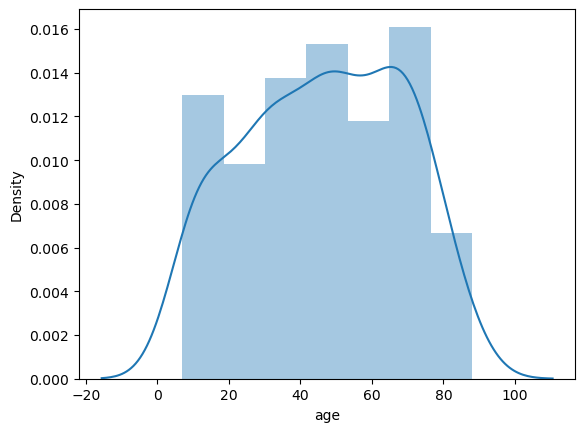

In [62]:
sns.distplot(df['age'])

In [63]:
#a,b = stats.kstest(df['aex'], "norm")
#print("statistiques", a, "p-values", b)

In [70]:
for i in df.drop(columns = ['sexe', 'age' ,'imc']):
    print([i])
    c,d = stats.kstest(df[i], "norm")
    print("statistiques", c, "p-values", d)

['vems']
statistiques 0.7731629278867247 p-values 6.7033141790085115e-139
['dep']
statistiques 0.9407820092392501 p-values 1.7413072989054593e-270
['cvf']
statistiques 0.8315456138637398 p-values 1.4899291468917552e-169
['dem25']
statistiques 0.5707499398474137 p-values 2.5955634317879843e-68
['dem50']
statistiques 0.803727165272072 p-values 5.160899426633621e-154
['dem75']
statistiques 0.9179279810277148 p-values 2.6792818902884156e-239
['aex']
statistiques 0.860855051947891 p-values 1.7622292581822896e-188


In [65]:
import scipy.stats
import numpy as np 
import statsmodels.api as sm 
import pylab as py 

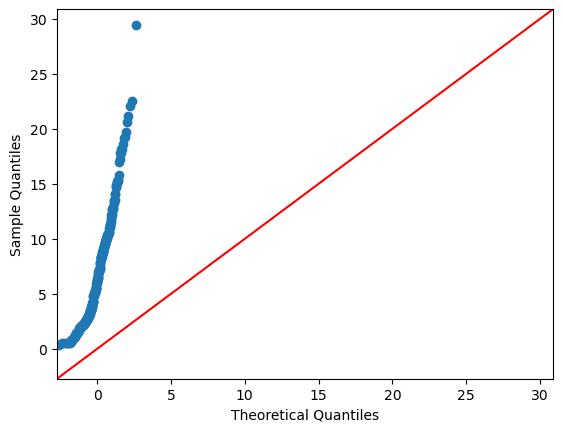

In [66]:
sm.qqplot(df['aex'], line ='45') 
py.show() 